### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

### Importing dataset

In [2]:
df=pd.read_csv("HousePricePrediction.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [5]:
df.shape

(2919, 13)

In [6]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [7]:
print(df['MSZoning'].value_counts())
print('-'*12)
print(df['LotConfig'].value_counts())
print('-'*12)
print(df['BldgType'].value_counts())
print('-'*12)
print(df['Exterior1st'].value_counts())

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
------------
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
------------
1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64
------------
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64


In [8]:
print(df['MSZoning'].unique(),"|",df['MSZoning'].nunique())
print('-'*12)
print(df['LotConfig'].unique(),"|",df['LotConfig'].nunique())
print('-'*12)
print(df['BldgType'].unique(),"|",df['BldgType'].nunique())
print('-'*12)
print(df['Exterior1st'].unique(),"|",df['Exterior1st'].nunique())

['RL' 'RM' 'C (all)' 'FV' 'RH' nan] | 5
------------
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] | 5
------------
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] | 5
------------
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' nan] | 15


In [9]:
df.drop(['Id'],axis=1,inplace=True)

In [10]:
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].median())

In [11]:
df.isnull().sum()

MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [12]:
df=df.dropna()

In [13]:
df.isna().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

### Data Visualization

<Axes: xlabel='MSZoning', ylabel='count'>

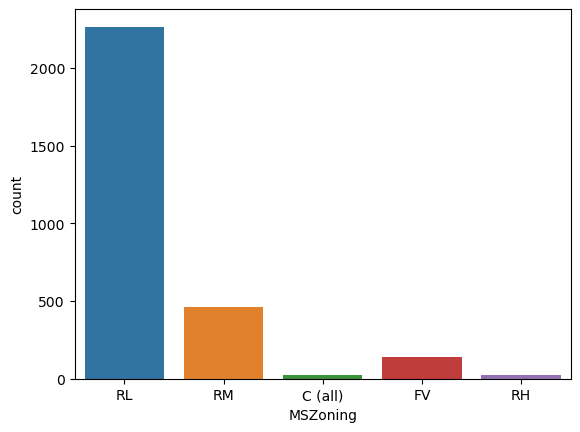

In [14]:
sns.countplot(data=df,x=df['MSZoning'])

<Axes: xlabel='LotConfig', ylabel='count'>

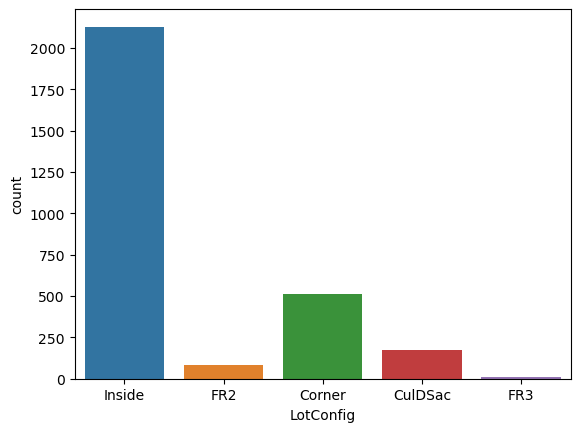

In [15]:
sns.countplot(data=df,x=df['LotConfig'])

<Axes: xlabel='BldgType', ylabel='count'>

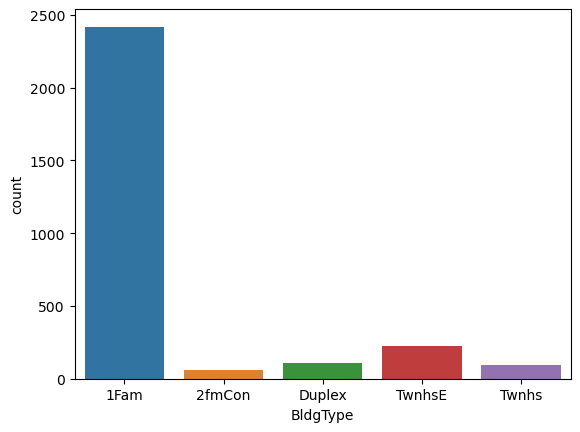

In [16]:
sns.countplot(data=df,x=df['BldgType'])

<Axes: xlabel='Exterior1st', ylabel='count'>

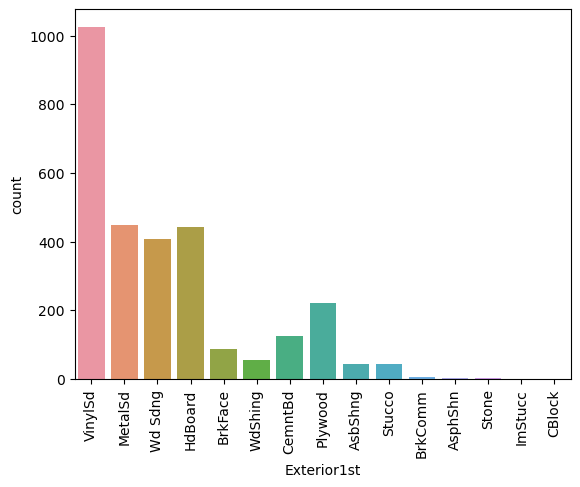

In [17]:
plt.xticks(rotation=90)
sns.countplot(data=df,x=df['Exterior1st'])

C:\Users\moink\AppData\Local\Temp\ipykernel_13624\2915607900.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap = "Greens",fmt = '.2f',annot = True)


<Axes: >

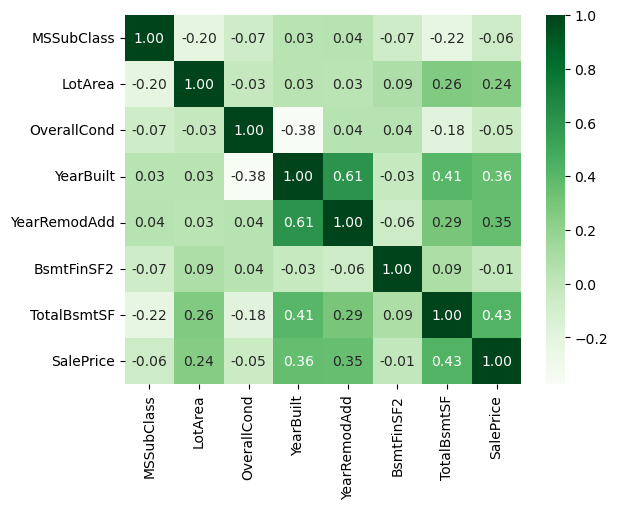

In [18]:
sns.heatmap(df.corr(),cmap = "Greens",fmt = '.2f',annot = True)

### Creating dummies of categorical variables

In [19]:
df=pd.get_dummies(df)

In [20]:
df.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting and model training

In [21]:
X = df.drop(['SalePrice'], axis=1)
Y = df['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=0)

In [22]:
model = LinearRegression().fit(x_train, y_train)
pred = model.predict(x_test)
print(mean_absolute_percentage_error(y_test,pred))

0.18095970706517064


In [23]:
model= RandomForestRegressor(n_estimators=10).fit(x_train,y_train)
pred = model.predict(x_test)
mean_absolute_percentage_error(y_test,pred)

0.1846978237453232

In [24]:
model = svm.SVR().fit(x_train,y_train)
pred = model.predict(x_test)
print(mean_absolute_percentage_error(y_test,pred))

0.1595311293150676
